# 📊 Exploratory Data Analysis (EDA)

## 🎯 Objective
- Explore the characteristics of the `US-CapydataViSportIC`, `UIT-ViIC` and `self_crawl` datasets.
- Analyze data distribution to ensure quality.
- Examine caption-related features (length, word count, word frequency).
- Identify any anomalies or potential issues that may affect model training.

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import itertools
import re
import os
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
us_captions_df = pd.read_csv('../data/US-Capydata-ViSportIC/processed_captions.txt', sep='\t', names=['image_filename', 'caption'], encoding='utf-8')
uit_captions_df = pd.read_csv('../data/UIT-ViIC/processed_captions.txt', sep='\t', names=['image_filename', 'caption'], encoding='utf-8')
self_captions_df = pd.read_csv('../data/self_crawl/processed_captions.txt', sep='\t', names=['image_filename', 'caption'], encoding='utf-8')

## 📊 Data Distribution Analysis

In [14]:
print("Number of captions in US-Capydata-ViSportIC dataset: ", len(us_captions_df))
print("Number of captions in UIT-ViIC dataset: ", len(uit_captions_df))
print("Number of captions in self crawl dataset: ", len(self_captions_df))

Number of captions in US-Capydata-ViSportIC dataset:  24633
Number of captions in UIT-ViIC dataset:  19253
Number of captions in self crawl dataset:  5380


In [15]:
us_captions_df.sample()

,image_filename,caption
9735,000000098820.jpg,một người phụ_nữ đang giơ vợt lên cao để đỡ qu...


In [16]:
uit_captions_df.sample()

,image_filename,caption
15182,000000180436.jpg,những cậu bé đang chơi bóng_đá ở ngoài_trời


In [17]:
self_captions_df.sample()

,image_filename,caption
329,100000000303.jpg,khi người và ngựa cùng nhau tạo nên câu_chuyện...


Check the number of captions per image

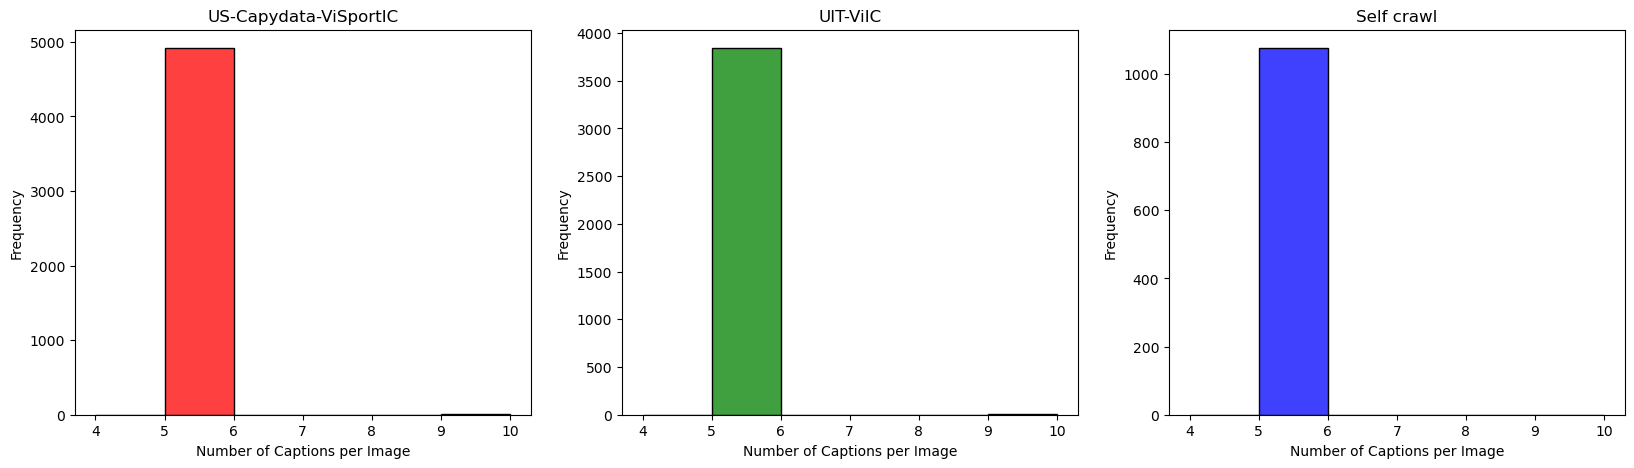

In [ ]:
us_captions_per_image = us_captions_df['image_filename'].value_counts()
uit_captions_per_image = uit_captions_df['image_filename'].value_counts()
self_captions_per_image = self_captions_df['image_filename'].value_counts()

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Thêm bins = range(4, 7) để đảm bảo chỉ có các giá trị mong muốn hiển thị
sns.histplot(us_captions_per_image, bins=range(4, 11), ax=ax[0], color='red', edgecolor=`black`)
sns.histplot(uit_captions_per_image, bins=range(4, 11), ax=ax[1], color='green', edgecolor=`black")
sns.histplot(self_captions_per_image, bins=range(4, 11), ax=ax[2], color='blue', edgecolor="black")

ax[0].set_title('US-Capydata-ViSportIC')
ax[1].set_title('UIT-ViIC')
ax[2].set_title('Self crawl')

for i in range(3):  # Set labels for all subplots
    ax[i].set_xlabel('Number of Captions per Image')
    ax[i].set_ylabel('Frequency')

plt.show()

In [27]:
# Filter cases with more than 5 captions
us_more_than_5 = us_captions_per_image[us_captions_per_image > 5]
uit_more_than_5 = uit_captions_per_image[uit_captions_per_image > 5]
self_more_than_5 = self_captions_per_image[self_captions_per_image > 5]

print("US-Capydata-ViSportIC dataset - Images with more than 5 captions:")
print(us_more_than_5)

print("\nUIT-ViIC dataset - Images with more than 5 captions:")
print(uit_more_than_5)

print("\nSelf crawl dataset - Images with more than 5 captions:")
print(self_more_than_5)

US-Capydata-ViSportIC dataset - Images with more than 5 captions:
image_filename
000000487607.jpg    10
000000487659.jpg    10
000000487788.jpg    10
000000549915.jpg     9
Name: count, dtype: int64

UIT-ViIC dataset - Images with more than 5 captions:
image_filename
000000487788.jpg    10
000000487659.jpg    10
000000487607.jpg    10
000000549915.jpg     9
Name: count, dtype: int64

Self crawl dataset - Images with more than 5 captions:
Series([], Name: count, dtype: int64)


$\implies$ All datasets have 5 captions per image (with one special case where UIT-ViIC has a few images with more than 5 captions, leading to an overflow in US-Capydata-ViSportIC). But it's still OK, much more is better!

## 📈 Descriptive Statistics

In [28]:
# Compute length of each caption
us_captions_df['caption_length'] = us_captions_df['caption'].apply(lambda x: len(x.split()))
uit_captions_df['caption_length'] = uit_captions_df['caption'].apply(lambda x: len(x.split()))
self_captions_df['caption_length'] = self_captions_df['caption'].apply(lambda x: len(x.split()))

In [36]:
# Statistics of caption length
print("US-Capydata-ViSportIC dataset:")
print(us_captions_df['caption_length'].describe())

print("\nUIT-ViIC dataset:")
print(uit_captions_df['caption_length'].describe())

print("\nSelf crawl dataset:")
print(self_captions_df['caption_length'].describe())

US-Capydata-ViSportIC dataset:
count    24633.000000
mean        10.924897
std          2.631157
min          4.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         31.000000
Name: caption_length, dtype: float64

UIT-ViIC dataset:
count    19253.000000
mean        10.034644
std          2.042605
min          4.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         31.000000
Name: caption_length, dtype: float64

Self crawl dataset:
count    5380.000000
mean       14.110781
std         1.944478
min         8.000000
25%        13.000000
50%        14.000000
75%        15.000000
max        23.000000
Name: caption_length, dtype: float64


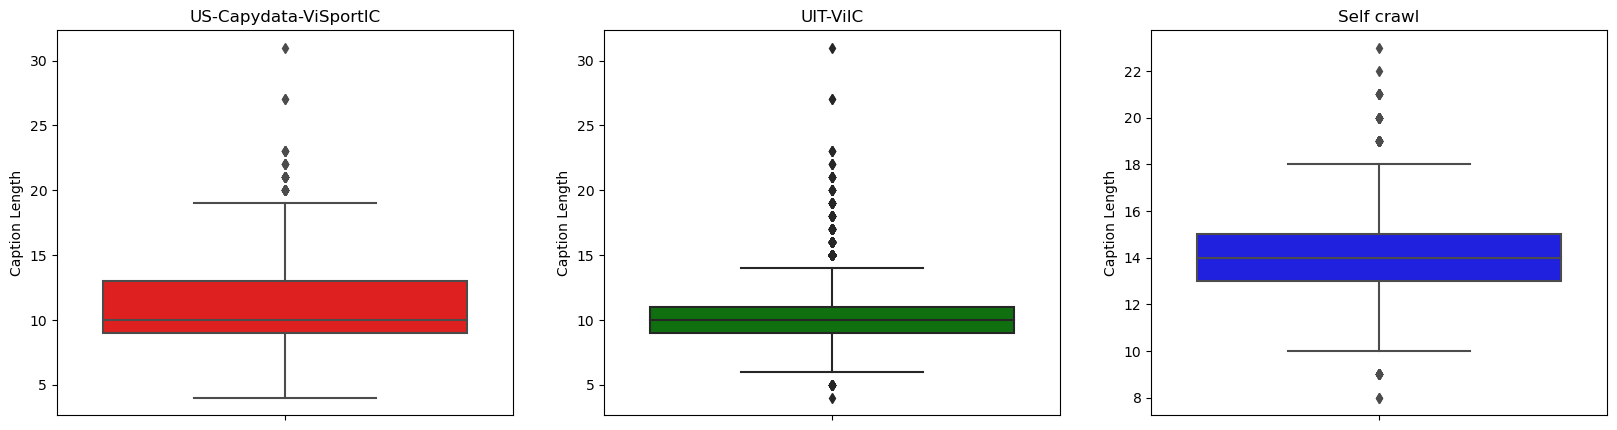

In [37]:
# Box plot for caption length
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(y=us_captions_df['caption_length'], ax=ax[0], color='red')
ax[0].set_title('US-Capydata-ViSportIC')
ax[0].set_ylabel('Caption Length')

sns.boxplot(y=uit_captions_df['caption_length'], ax=ax[1], color='green')
ax[1].set_title('UIT-ViIC')
ax[1].set_ylabel('Caption Length')

sns.boxplot(y=self_captions_df['caption_length'], ax=ax[2], color='blue')
ax[2].set_title('Self crawl')
ax[2].set_ylabel('Caption Length')

plt.show()

The self_crawl images were annotated using gpt-4o-mini with a requirement of 15-20 words, so most of the data falls within that range. On the other hand, the UIT-ViIC dataset primarily contains captions around 10 words. Since the UIT-ViIC dataset has more data, it biases the overall US-Capydata-ViSportIC dataset towards captions around 10 words.

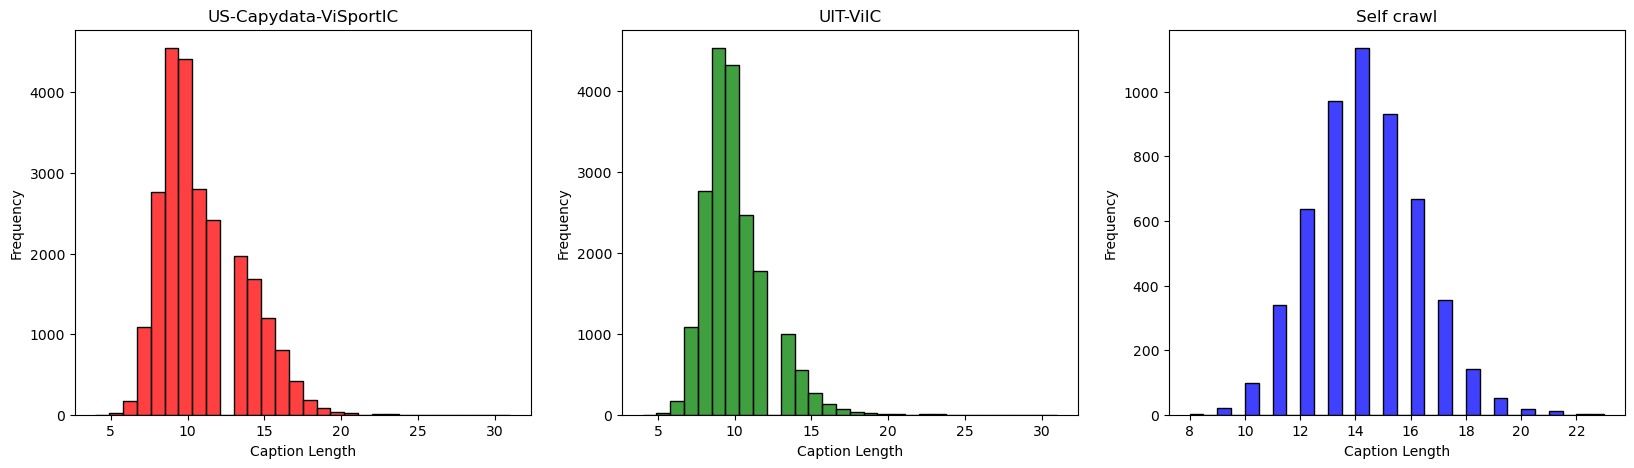

In [49]:
# Visualize caption length distribution
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(us_captions_df['caption_length'], bins=30, ax=ax[0], color='red', edgecolor="black")
sns.histplot(uit_captions_df['caption_length'], bins=30, ax=ax[1], color='green', edgecolor="black")
sns.histplot(self_captions_df['caption_length'], bins=30, ax=ax[2], color='blue', edgecolor="black")

ax[0].set_title('US-Capydata-ViSportIC')
ax[1].set_title('UIT-ViIC')
ax[2].set_title('Self crawl')

for i in range(3):  # Set labels for all subplots
    ax[i].set_xlabel('Caption Length')
    ax[i].set_ylabel('Frequency')

plt.show()

1. US-Capydata-ViSportIC & UIT-ViIC (Left & Center Plots)
- Right-skewed (positive skew): Most captions are between 8-15 words, but there are some outliers above 20-30 words.
- This suggests that a few long captions could be affecting model training.

2. Self-Crawl Dataset (Right Plot)
- More balanced, slightly symmetric distribution, centered around 13-16 words.
- Less extreme outliers, so no major filtering needed.

$\implies$ Thus, we will do as below:
- For US-Capydata & UIT-ViIC:
    - Consider truncating captions longer than ~20 words (since they are rare).
    - Alternatively, filter out captions above the 95th percentile if they significantly deviate.

- For Self-Crawl Dataset
    - No need for filtering or truncation since the distribution is naturally centered.
    - It might even help balance the dataset when combined with the others.


## 🧐 Correlation Between Variables

### Word Frequency Analysis

In [50]:
from collections import Counter

# Count word frequencies
us_word_freq = Counter(itertools.chain(*us_captions_df['caption'].apply(lambda x: x.split())))
uit_word_freq = Counter(itertools.chain(*uit_captions_df['caption'].apply(lambda x: x.split())))
self_word_freq = Counter(itertools.chain(*self_captions_df['caption'].apply(lambda x: x.split())))

# Sort word frequencies
us_word_freq = dict(sorted(us_word_freq.items(), key=lambda x: x[1], reverse=True))
uit_word_freq = dict(sorted(uit_word_freq.items(), key=lambda x: x[1], reverse=True))
self_word_freq = dict(sorted(self_word_freq.items(), key=lambda x: x[1], reverse=True))

In [52]:
# Display top 20 frequent words US-Capydata-ViSportIC dataset
print("Top 20 frequent words in US-Capydata-ViSportIC dataset:")
list(us_word_freq.items())[:20]

Top 20 frequent words in US-Capydata-ViSportIC dataset:


[('đang', 19531),
 ('bóng', 11770),
 ('một', 9275),
 ('tennis', 8973),
 ('người', 8889),
 ('trên', 8800),
 ('sân', 7279),
 ('vận_động_viên', 5441),
 ('cầu_thủ', 5146),
 ('bóng_chày', 5009),
 ('ở', 4475),
 ('đàn_ông', 4418),
 ('vợt', 4381),
 ('đánh', 4216),
 ('cầm', 3611),
 ('để', 3331),
 ('chơi', 3085),
 ('trong', 2952),
 ('và', 2617),
 ('chuẩn_bị', 2555)]

In [53]:
# Display top 20 frequent words UIT-ViIC dataset
print("Top 20 frequent words in UIT-ViIC dataset:")
list(uit_word_freq.items())[:20]

Top 20 frequent words in UIT-ViIC dataset:


[('đang', 17875),
 ('bóng', 11279),
 ('tennis', 8912),
 ('người', 8453),
 ('trên', 8044),
 ('một', 7795),
 ('sân', 6944),
 ('bóng_chày', 5009),
 ('cầu_thủ', 4783),
 ('ở', 4418),
 ('đàn_ông', 4415),
 ('vợt', 4305),
 ('đánh', 3968),
 ('vận_động_viên', 3702),
 ('cầm', 3579),
 ('để', 3150),
 ('chơi', 3033),
 ('quả', 2277),
 ('thi_đấu', 2068),
 ('phụ_nữ', 2010)]

In [54]:
# Display top 20 frequent words self_crawl dataset
print("Top 20 frequent words in self_crawl dataset:")
list(self_word_freq.items())[:20]

Top 20 frequent words in self_crawl dataset:


[('vận_động_viên', 1739),
 ('đang', 1656),
 ('trong', 1656),
 ('một', 1480),
 ('và', 1013),
 ('cú', 997),
 ('của', 974),
 ('đầy', 946),
 ('những', 916),
 ('với', 908),
 ('sự', 891),
 ('cho', 851),
 ('đấu', 807),
 ('trên', 756),
 ('thể_hiện', 730),
 ('này', 640),
 ('chuẩn_bị', 611),
 ('trận', 592),
 ('mạnh_mẽ', 559),
 ('khi', 525)]

### Visualizing Word Frequency

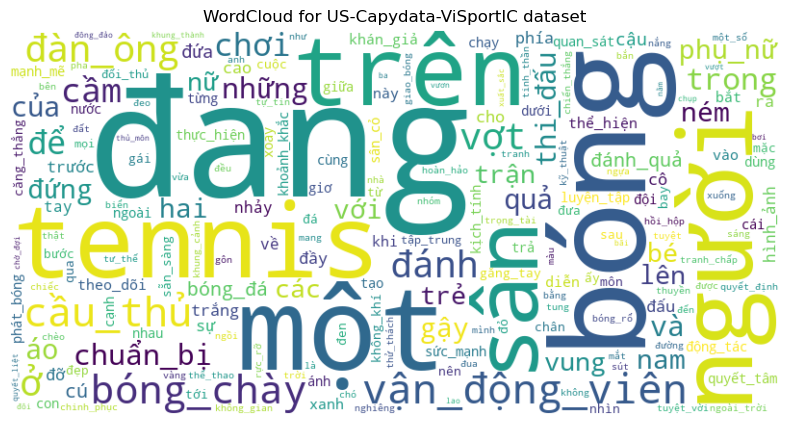

In [56]:
# WordCloud for US-Capydata-ViSportIC dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(us_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for US-Capydata-ViSportIC dataset')
plt.show()

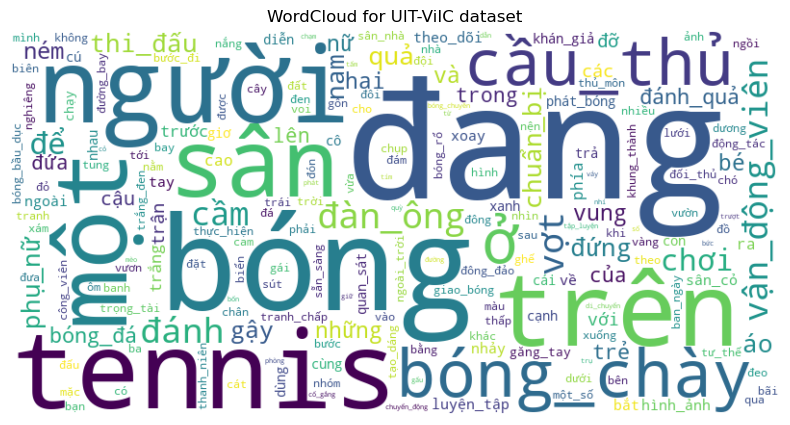

In [57]:
# WordCloud for UIT-ViIC dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(uit_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for UIT-ViIC dataset')
plt.show()

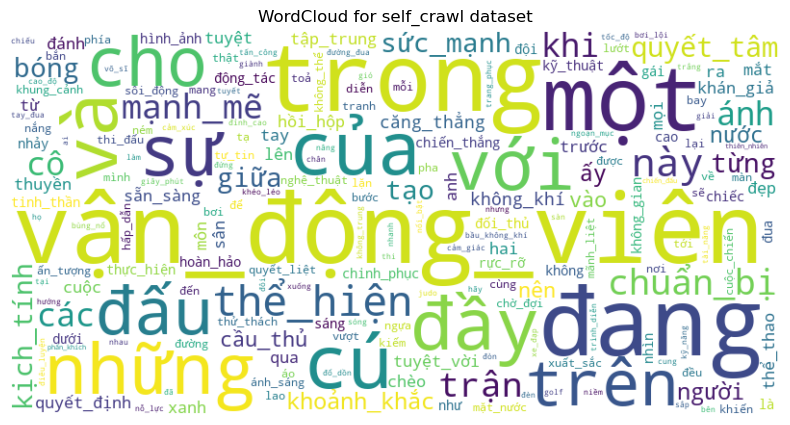

In [58]:
# WordCloud for self_crawl dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(self_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for self_crawl dataset')
plt.show()

## 📉 Data Visualization 

### Hiển thị mẫu ảnh và captions

In [59]:
import os
import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image
from transformers import ViTImageProcessor

In [67]:
# Transform cho CNN (ResNet)
cnn_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Chuẩn hóa theo ImageNet
])

def preprocess_cnn(image_path):
    image = Image.open(image_path).convert("RGB")
    return cnn_transform(image)

# Load ViT Image Processor
vit_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

def preprocess_vit(image_path):
    image = Image.open(image_path).convert("RGB")
    return vit_processor(images=image, return_tensors="pt")  # Trả về tensor

def visualize_preprocessing(image_path, captions):
    # Original image
    original_img = Image.open(image_path).convert("RGB")

    # CNN preprocessed image
    processed_cnn = preprocess_cnn(image_path)
    processed_cnn_np = processed_cnn.permute(1, 2, 0).numpy()  # Chuyển tensor về numpy
    processed_cnn_np = (processed_cnn_np * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]  # Unnormalize
    processed_cnn_np = processed_cnn_np.clip(0, 1)  # Giữ giá trị trong khoảng hợp lệ

    # ViT preprocessed image
    processed_vit = preprocess_vit(image_path)["pixel_values"][0]  # Lấy tensor từ output
    processed_vit_np = processed_vit.permute(1, 2, 0).numpy()  # Chuyển tensor về numpy
    processed_vit_np = (processed_vit_np * 0.5) + 0.5  # Unnormalize ViT
    processed_vit_np = processed_vit_np.clip(0, 1)  

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(original_img)
    axs[0].set_title("Ảnh gốc")
    axs[0].axis("off")

    axs[1].imshow(processed_cnn_np)
    axs[1].set_title("Sau CNN Preprocessing")
    axs[1].axis("off")

    axs[2].imshow(processed_vit_np)
    axs[2].set_title("Sau ViT Preprocessing")
    axs[2].axis("off")

    plt.show()
    
    # Caption
    for i, caption in enumerate(captions):
        print(f"Caption {i + 1}: {caption}")

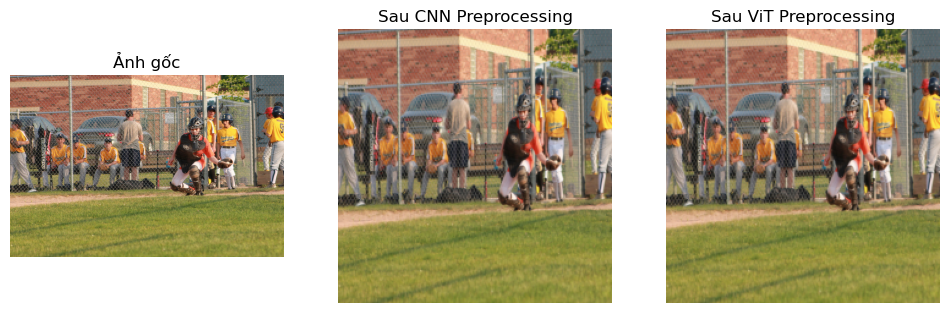

Caption 1: các cầu_thủ bóng_chày đang đứng ở trên sân
Caption 2: các cầu_thủ bóng_chày đang đứng ở sau tấm lưới
Caption 3: một cầu_thủ bắt bóng đang cầm quả bóng_chày ở trong tay
Caption 4: những người đàn_ông đang đứng ở sau cái lưới
Caption 5: một cầu_thủ bắt bóng đang khuỵu gối ở trên sân


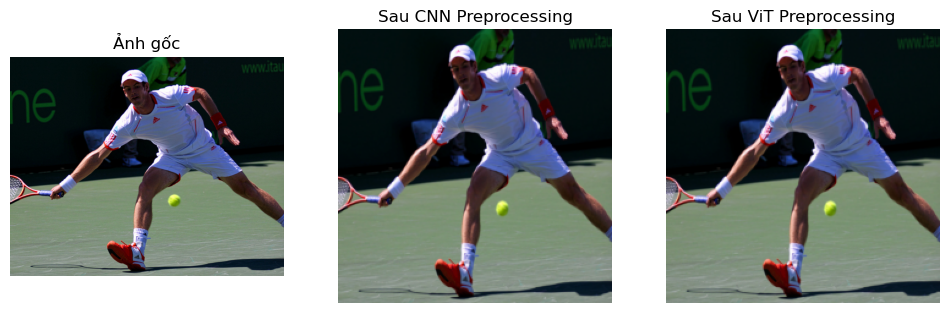

Caption 1: người đàn_ông mặc áo trắng đang chơi tennis trên sân
Caption 2: vận_động_viên tennis nam đang vung vợt tennis về phía bóng
Caption 3: vận_động_viên tennis nam đang cầm vợt tennis đỡ bóng thấp
Caption 4: vận_động_viên tennis đang cầm vợt thi_đấu trên sân
Caption 5: vận_động_viên tennis nam đang bước dài sang trái đỡ bóng


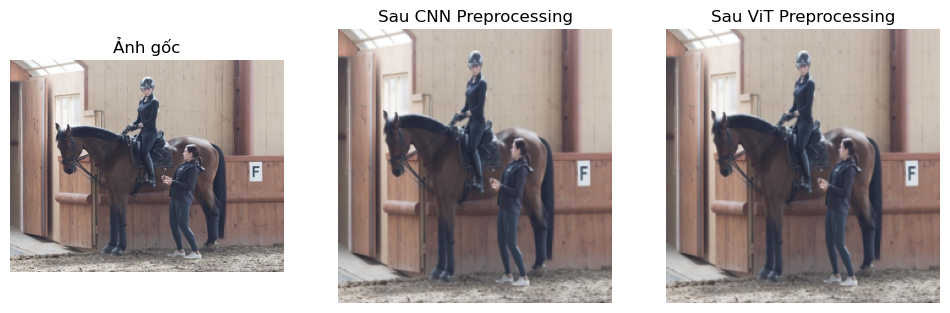

Caption 1: một vận_động_viên cưỡi ngựa chuẩn_bị cho bài_tập nhảy đầy thử_thách trong không_gian tập_luyện
Caption 2: hình_ảnh gây hồi_hộp khi cô gái hướng_dẫn ngựa vào vị_trí hoàn_hảo mọi ánh nhìn đều đổ_dồn
Caption 3: những khoảnh_khắc tập_luyện đỉnh_cao cô và ngựa đang hồi_hộp trước những bước nhảy mạnh_mẽ
Caption 4: không_khí trong sân tập ngựa đang trở_nên căng_thẳng khi cuộc thi cưỡi sắp bắt_đầu
Caption 5: cô gái trong bộ_đồ cưỡi thể_hiện sự tập_trung cao_độ chuẩn_bị cho những bước_đi quyết_định


In [68]:
import random

image_filenames = os.listdir("../data/US-Capydata-ViSportIC/images")
images_folder = "../data/US-Capydata-ViSportIC/images"
captions_df = pd.read_csv('../data/US-Capydata-ViSportIC/processed_captions.txt', sep='\t', names=['image_filename', 'caption'], encoding='utf-8')

random_indices = random.sample(range(len(image_filenames)), 3)

for i in random_indices:
    image_path = os.path.join(images_folder, image_filenames[i])
    image_id = image_filenames[i]
    captions = captions_df[captions_df['image_filename'] == image_id]['caption'].tolist()
    visualize_preprocessing(image_path, captions)

## 📌 Summary
### 📋 Key Findings from EDA:

**1️⃣ Dataset Size & Caption Distribution:**
- **US-Capydata-ViSportIC:** `24,633 captions`
- **UIT-ViIC:** `19,253 captions`
- **Self-crawl:** `5,380 captions`
$\implies$ All datasets maintain `5 captions per image`, except for a few UIT-ViIC images with more than 5 captions.

**2️⃣ Caption Length Distribution:**
- **UIT-ViIC & US-Capydata-ViSportIC:** Captions mostly `range from 8-15 words`, but contain outliers exceeding 30 words
- **Self-crawl dataset:** Captions are `more uniform (13-16 words)`, with fewer extreme outliers
$\implies$ Filtering suggestion: Consider truncating captions >20 words in UIT-ViIC & US-Capydata-ViSportIC to improve model consistency.

**3️⃣ Most Frequent Words (Word Cloud Analysis):**
- **UIT-ViIC & US-Capydata-ViSportIC:**
    - Dominant words: `đang`, `bóng`, `một`, `tennis`, `trên`, `sân`, `vận_động_viên`
    - Focuses on action-based descriptions (e.g., `đánh`, `chơi`, `chuẩn_bị`)
- **Self-crawl dataset:**
    - More diverse phrasing with words like `sự`, `cú`, `đầy`, `thể_hiện`, `quyết_tâm`
    - Suggests richer contextual details than UIT-ViIC.

**4️⃣ Implications for Model Training:**
- Self-crawl dataset improves lexical diversity, balancing the dataset when merged.
- Filtering long captions (>20 words) could improve model performance.
- Next Steps:
    - Check for semantic overlap between datasets to avoid redundancy.
    - Normalize terminology across datasets for consistency.
    - Consider synthetic data augmentation for low-represented sports categories.
    
### 💡 Conclusion:
The combination of UIT-ViIC, US-Capydata-ViSportIC, and Self-crawl datasets enhances caption diversity and completeness. Further preprocessing (length filtering, normalization) could refine model training quality.